In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 200

In [45]:
world_state = np.zeros(T, int)   #0: the first box has food; 1: second box has food
loc = np.zeros(T, int)        #0: first box               1: second box
obs = np.zeros(T, int)        #0: did not get food        1: get food
act = np.zeros(T, int)        #0 : stay                   1: switch and get food from the other side
bel = np.zeros(T, float)        # the probability that the first box has food, 
                         # then the probability that the second box has food is 1-b

threshold = .6
p_01 = .3
p_10 = .4
p = np.array([p_01, 1-p_10]) # probability 0->1, 1->1
Tr = np.array([[1 - p_01, p_10], [p_01, 1-p_10]])

In [46]:
def policy(threshold, bel, loc):
    if loc == 0:
        if bel >= threshold:
            act = 1
        else:
            act = 0
    else: #loc = 1
        if 1 - bel >= threshold:
            act = 1
        else:
            act = 0
    
    return act

In [49]:
for t in range(T):
    if t == 0:
        world_state[t] = 0
        loc[t] = 0
        obs[t] = 0
        bel[t] = np.random.random(1)
        
        act[t] = policy(threshold, bel[t], loc[t])
        
    else:
        if act[t - 1] == 0:
            world_state[t] = np.random.binomial(1, p[world_state[t-1]])
            loc[t] = loc[t-1]
            obs[t] = 0
            bel[t] = Tr.dot(np.array([bel[t-1], 1- bel[t-1]]))[0]
        else: #after weitching, open the new box, deplete if any; then wait a usualy time
            loc[t] = 1 - loc[t-1]
            if world_state[t - 1] == loc[t]:
                obs[t] = 1
            else:
                obs[t] = 0
            
            world_state[t] = 1 - loc[t]
            bel[t] = loc[t]
            # with swtiching and open action, if loc = 0, 1st box empty, 2nd filled. s = 1; vice versa
            
            #update beleif and state for a usual waiting time
            world_state[t] = np.random.binomial(1, p[world_state[t]])
            bel[t] = Tr.dot(np.array([bel[t], 1- bel[t]]))[0]
        

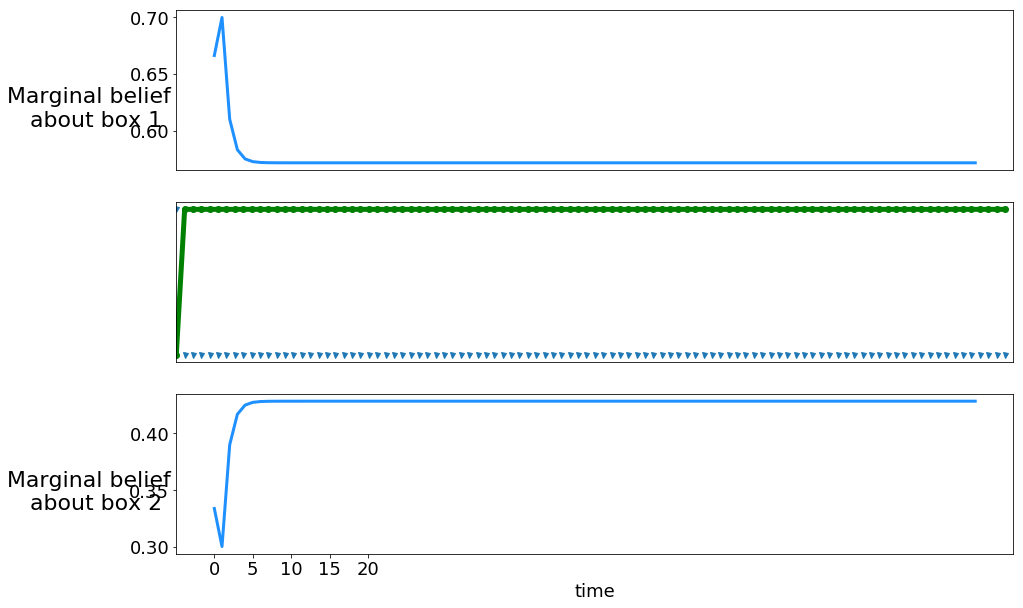

In [71]:
showlen = 100
startT = 0 

endT = startT + showlen
showT = range(startT,endT)

fig_posterior, [ax1, ax_loc, ax2] = plt.subplots(3, 1, figsize= (15, 10))

ax1.plot(bel[showT], color = 'dodgerblue', markersize = 10,linewidth=3.0)
ax1.yaxis.set_label_coords(-0.1,0.25)
ax1.set_ylabel('Marginal belief \n about box 1', rotation= 360, fontsize = 22)
ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=18)



#ax_loc = plt.subplot(gs1[2])
#ax_loc = fig_posterior.add_subplot(513)
ax_loc.plot(loc[showT], 'g.-', markersize = 12, linewidth = 5)
#ax_loc.plot((np.remainder(loc[showT]+1, 3) - 1 ) * 10, 'm-')
ax_loc.plot(act[showT],'v', markersize = 5)
# ax_loc.plot(rew[showT] * 9, 'c*')
# box1_r = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * np.insert(rew[showT][1:], -1, 0) * 1.0 
# box2_r = act[showT] // 4 * 7 * (np.remainder(loc[showT]+1, 3) - 2) * np.insert(rew[showT][1:], -1, 0) * 1.0
# box1_n = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * (1-np.insert(rew[showT][1:], -1, 0))* 1.0 * (loc[showT] != 0)
# box2_n = act[showT] // 4 * 7 * ((np.remainder(loc[showT]+1, 3) - 2) * (1-np.insert(rew[showT][1:], -1, 0)))* 1.0 * (loc[showT] != 0)
# box1_r[ box1_r==0 ] = np.nan
# box2_n[ box2_n==0 ] = np.nan
# box2_r[ box2_r==0 ] = np.nan
# box1_n[ box1_n==0 ] = np.nan
# ax_loc.plot(box2_r, '^', c = 'red', markersize = 15)
# ax_loc.plot(box1_n, 'v', c = 'blue', markersize = 15)
# ax_loc.plot(box2_n, '^', c = 'blue', markersize = 15)
# ax_loc.plot(box1_r, 'v', c = 'red', markersize = 15)

ax_loc.set_xlim([0,showlen])
# ax_loc.spines['top'].set_visible(False)
# ax_loc.spines['right'].set_visible(False)
# ax_loc.spines['bottom'].set_visible(False)
# ax_loc.spines['left'].set_visible(False)
#ax_loc.set_ylim([1,16])
ax_loc.set_yticks([])
ax_loc.set_xticks([])



#ax2 = plt.subplot(gs1[4])
#ax2 = fig_posterior.add_subplot(515)
#ax2.imshow(belief2_est[showT].T, interpolation='Nearest', cmap='gray', origin='lower',aspect='auto')
ax2.plot(1 - bel[showT], color = 'dodgerblue', markersize = 10,linewidth=3.0)
#ax2.set(title = 'belief of box 2 based on estimated parameters')
ax2.set_xlabel('time', fontsize = 18)
#ax2.get_yaxis().labelpad = 70
ax2.yaxis.set_label_coords(-0.1,0.25)
ax2.set_ylabel('Marginal belief \n about box 2', rotation= 360, fontsize = 22)
ax2.set_xticks([0, 5,10,15,20])
ax2.tick_params(axis='both', which='major', labelsize=18)
#ax2.set_yticks([0, nq-1])
#ax2.set_yticklabels(['0','1'])


# #ax4 = plt.subplot(gs1[3])
# #ax4 = fig_posterior.add_subplot(514)
# ax4.imshow(np.tile(col2[showT], (3,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
# #ax4.get_yaxis().labelpad = 70
# ax4.yaxis.set_label_coords(-0.1,0)
# ax4.set_ylabel('box 2 color', color = 'slateblue', rotation= 360, fontsize = 22)
# ax4.set_xticks([])
# ax4.set_yticks([])
# ax4.spines['top'].set_visible(False)
# ax4.spines['right'].set_visible(False)
# ax4.spines['bottom'].set_visible(False)
# ax4.spines['left'].set_visible(False)

# plt.tight_layout()
plt.show()
